In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df1=pd.read_csv('Public Debt.csv', header=2)
df1.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Year,Month,Domestic Debt,External Debt,Total
1,1999,9,"183,417.00","320,137.00","503,554.00"
2,1999,12,"190,300.00","311,953.00","502,253.00"
3,2000,3,"201,463.22","396,800.00","598,263.22"
4,2000,6,"206,127.00","395,694.00","601,821.00"


In [3]:
df1.columns=df1.iloc[0]
df1=df1[1:].reset_index(drop=True)
df1.head()

,Year,Month,Domestic Debt,External Debt,Total
0,1999,9,"183,417.00","320,137.00","503,554.00"
1,1999,12,"190,300.00","311,953.00","502,253.00"
2,2000,3,"201,463.22","396,800.00","598,263.22"
3,2000,6,"206,127.00","395,694.00","601,821.00"
4,2000,7,"202,362.00","394,667.37","597,029.37"


In [4]:
data=pd.read_excel('m_s.xlsx')
data.head()

,Month,Domestic Debt (KSh Millions),External Debt (KSh Millions),Total Public Debt (KSh Millions)
0,May 2025,6203540,5308180,11511720
1,June 2025,6326010,5484830,11810840
2,July 2025,6386240,5385300,11771540
3,August 2025,6564520,5403280,11967800
4,September 2025,6660420,5393530,12053950


In [5]:
data['Month']=pd.to_datetime(data['Month'])
data['Year']=data['Month'].dt.year
data['Month']=data['Month'].dt.month

In [6]:
data.head()

,Month,Domestic Debt (KSh Millions),External Debt (KSh Millions),Total Public Debt (KSh Millions),Year
0,5,6203540,5308180,11511720,2025
1,6,6326010,5484830,11810840,2025
2,7,6386240,5385300,11771540,2025
3,8,6564520,5403280,11967800,2025
4,9,6660420,5393530,12053950,2025


In [7]:
data=data.rename(columns={'Domestic Debt (KSh Millions)':'Domestic Debt','External Debt (KSh Millions)':'External Debt','Total Public Debt (KSh Millions)':'Total'})
data.head()

,Month,Domestic Debt,External Debt,Total,Year
0,5,6203540,5308180,11511720,2025
1,6,6326010,5484830,11810840,2025
2,7,6386240,5385300,11771540,2025
3,8,6564520,5403280,11967800,2025
4,9,6660420,5393530,12053950,2025


In [8]:
df1.columns=df1.columns.str.strip()
data.columns=data.columns.str.strip()

df=pd.concat([df1, data], ignore_index=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           307 non-null    object
 1   Month          307 non-null    object
 2   Domestic Debt  307 non-null    object
 3   External Debt  307 non-null    object
 4   Total          307 non-null    object
dtypes: object(5)
memory usage: 12.1+ KB


In [10]:
cols=['Year','Month','Domestic Debt','External Debt','Total']
for col in cols:
    df[col]=df[col].astype(str).str.replace(',', '', regex=False)
    df[col]=pd.to_numeric(df[col], errors='coerce')

In [11]:
df.head()

,Year,Month,Domestic Debt,External Debt,Total
0,1999,9,183417.00,320137.00,503554.00
1,1999,12,190300.00,311953.00,502253.00
2,2000,3,201463.22,396800.00,598263.22
3,2000,6,206127.00,395694.00,601821.00
4,2000,7,202362.00,394667.37,597029.37


In [13]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Year,307.0,2.012453e+03,7.414009e+00,1999.0,2006.00,2012.00,2019.000,2.025000e+03
Month,307.0,6.527687e+00,3.445426e+00,1.0,4.00,7.00,9.000,1.200000e+01
Domestic Debt,307.0,1.747315e+06,1.733189e+06,183417.0,366399.51,958438.68,2756759.675,6.660420e+06
External Debt,307.0,1.775708e+06,1.712079e+06,311953.0,424379.89,812700.17,2838662.530,6.189967e+06
Total,307.0,3.523022e+06,3.434468e+06,502253.0,793551.59,1783021.80,5595422.205,1.205395e+07


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           307 non-null    int64  
 1   Month          307 non-null    int64  
 2   Domestic Debt  307 non-null    float64
 3   External Debt  307 non-null    float64
 4   Total          307 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 12.1 KB


In [15]:
df.isnull().sum()

Year             0
Month            0
Domestic Debt    0
External Debt    0
Total            0
dtype: int64

In [16]:
yt=df.groupby('Year')['Total'].sum()/1_000_000
yt.sort_values(ascending=False).head(10)

Year
2024    128.841911
2023    121.646421
2025    104.116630
2022    103.384931
2021     92.730577
2020     81.139033
2019     69.238093
2018     60.556302
2017     51.726576
2016     42.384889
Name: Total, dtype: float64

In [17]:
data=df[df['Month']==6]
data

,Year,Month,Domestic Debt,External Debt,Total
3,2000,6,206127.00,395694.000,601821.00
15,2001,6,211812.60,393978.000,605790.60
27,2002,6,235991.00,377748.000,613739.00
39,2003,6,289376.97,407053.000,696429.97
51,2004,6,306234.66,443157.430,749392.09
63,2005,6,315572.50,433975.650,749548.15
75,2006,6,357838.95,431236.830,789075.78
87,2007,6,404690.11,396564.000,801254.11
99,2008,6,430611.73,439967.000,870578.73
111,2009,6,518346.15,535143.700,1053489.84


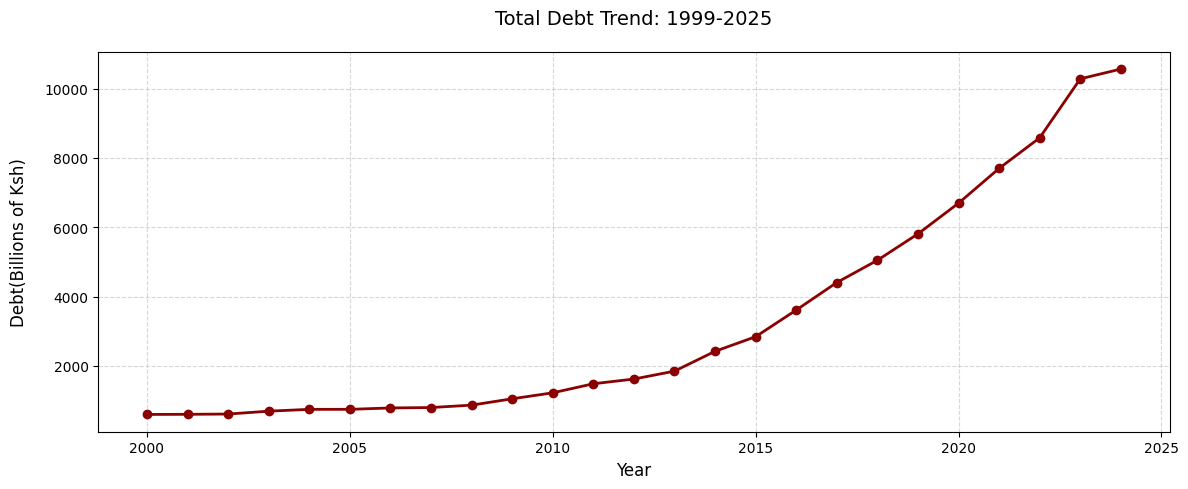

In [18]:
plt.figure(figsize=(12,5))
a2=data[data['Year']<2025].groupby('Year')['Total'].sum()/1_000
plt.plot( a2.index, a2.values, marker='o', color='darkred', linewidth=2, label='Total Debt')
plt.title('Total Debt Trend: 1999-2025', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12, )
plt.ylabel('Debt(Billions of Ksh)', fontsize=12, labelpad=12)
plt.grid(True, which='both', linestyle='--', alpha=0.5)
latest_year= data.index[-1]
latest_value=data.index[-1]
plt.annotate(
    f'{latest_value:.2f}T',
    xy=(latest_year, latest_value),
    xytext=(0,10),
    textcoords='offset points',
    ha='center',
    fontweight='bold'
)
plt.tight_layout()
plt.show()

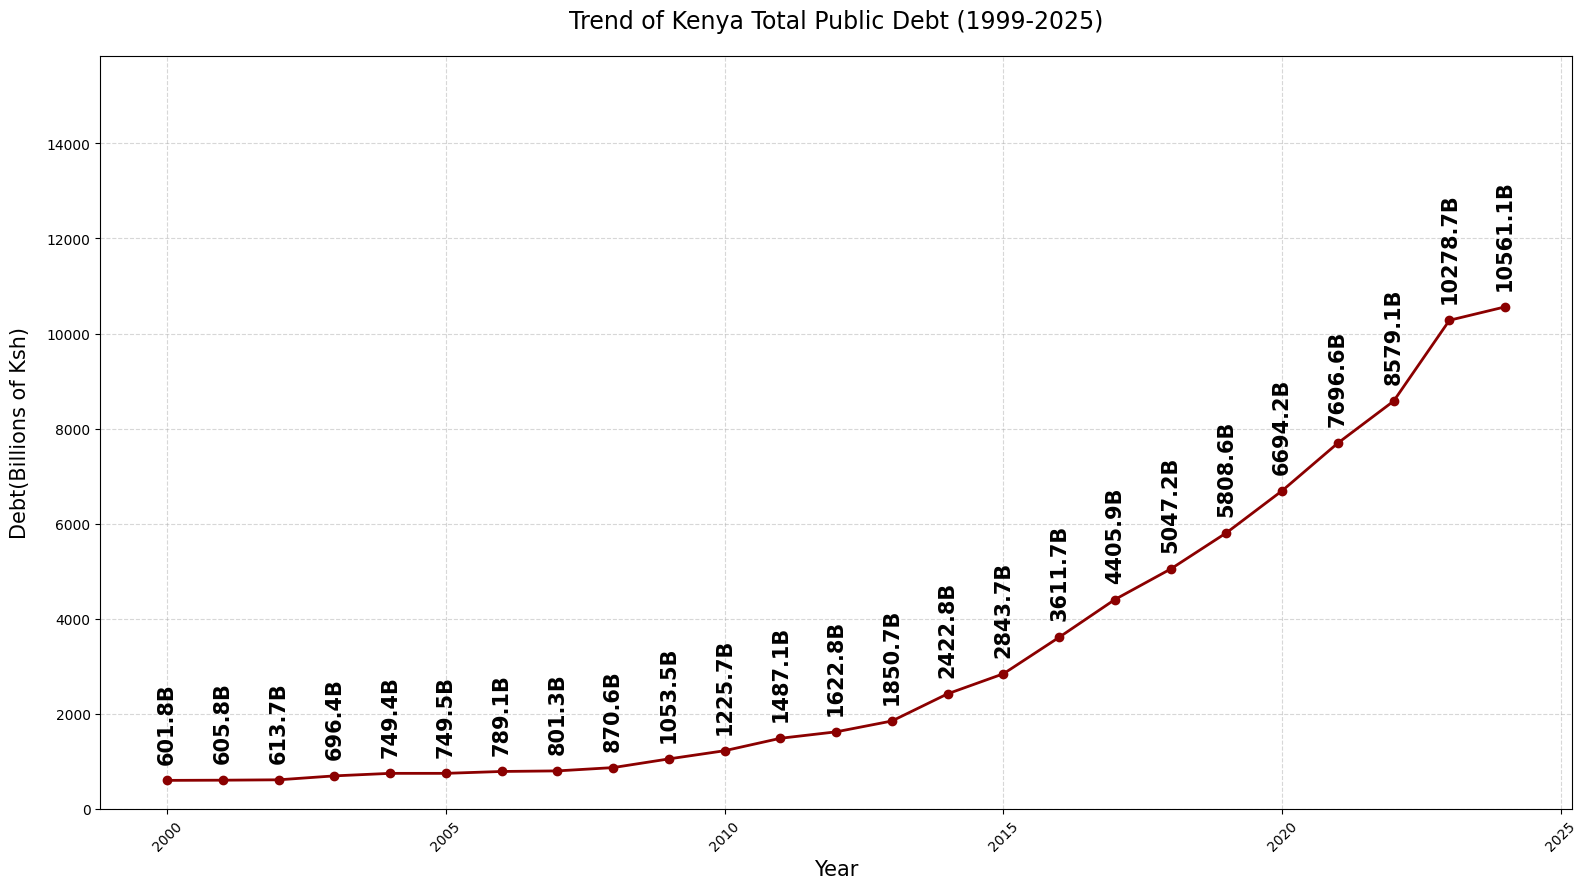

In [19]:
plt.figure(figsize=(16,9))
data_grouped=data[data['Year']<2025].groupby('Year')['Total'].sum()/1000
plt.plot( data_grouped.index, data_grouped.values, marker='o', color='darkred', linewidth=2, label='Total Debt')

for year, value in data_grouped.items():
    plt.annotate(
        f'{value:.1f}B',
        xy=(year, value),
        textcoords='offset points',
        xytext=(0, 15),
        ha='center',
        fontsize=15,
        fontweight='bold',
        rotation=90
    )

plt.title('Trend of Kenya Total Public Debt (1999-2025)', fontsize=17, pad=20)
plt.xlabel('Year', fontsize=15, )
plt.ylabel('Debt(Billions of Ksh)', fontsize=15, labelpad=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.ylim(0, data_grouped.max() * 1.5) 
plt.tight_layout()
plt.show()

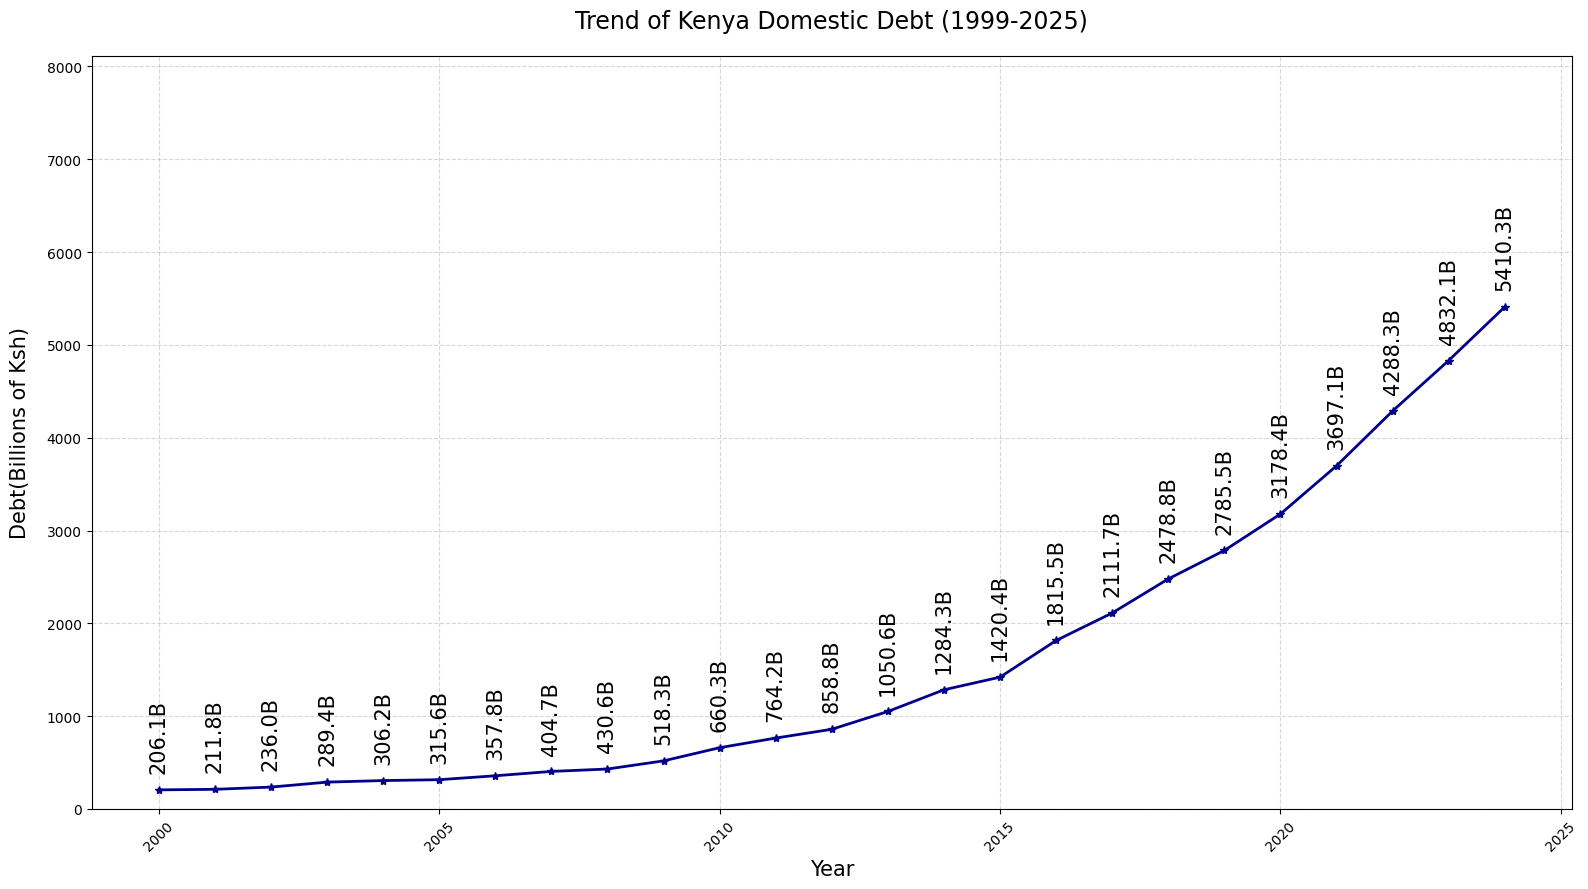

In [20]:
plt.figure(figsize=(16,9))
data_grouped1=data[data['Year']<2025].groupby('Year')['Domestic Debt'].sum()/1000
plt.plot( data_grouped1.index, data_grouped1.values, marker='*', color='darkblue', linewidth=2, label='Domestic Debt')

for year, value in data_grouped1.items():
    plt.annotate(
        f'{value:.1f}B',
        xy=(year, value),
        textcoords='offset points',
        xytext=(0, 15),
        ha='center',
        fontsize=15,
        rotation=90
    )

plt.title('Trend of Kenya Domestic Debt (1999-2025)', fontsize=17, pad=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Debt(Billions of Ksh)', fontsize=15, labelpad=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.ylim(0, data_grouped1.max() * 1.5) 
plt.tight_layout()
plt.show()

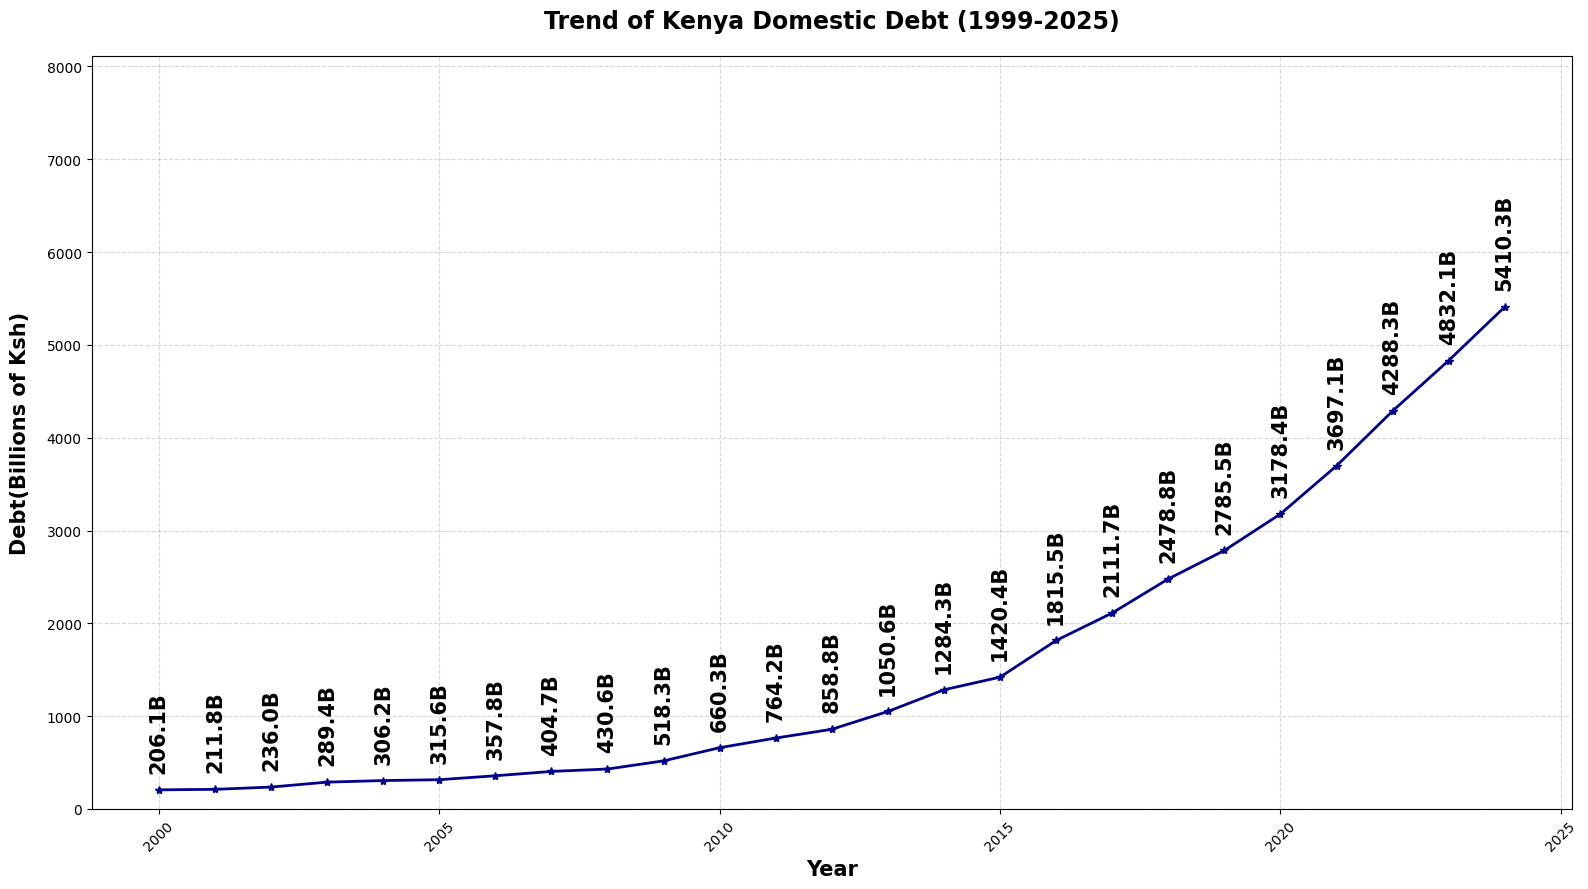

In [21]:
plt.figure(figsize=(16,9))
data_grouped1=data[data['Year']<2025].groupby('Year')['Domestic Debt'].sum()/1000
plt.plot( data_grouped1.index, data_grouped1.values, marker='*', color='darkblue', linewidth=2, label='Domestic Debt')

for year, value in data_grouped1.items():
    plt.annotate(
        f'{value:.1f}B',
        xy=(year, value),
        textcoords='offset points',
        xytext=(0, 15),
        ha='center',
        fontsize=15,
        fontweight='bold',
        rotation=90
    )

plt.title('Trend of Kenya Domestic Debt (1999-2025)', fontsize=17, pad=20, fontweight='bold')
plt.xlabel('Year', fontsize=15, fontweight='bold')
plt.ylabel('Debt(Billions of Ksh)', fontsize=15, labelpad=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.ylim(0, data_grouped1.max() * 1.5) 
plt.tight_layout()
plt.show()

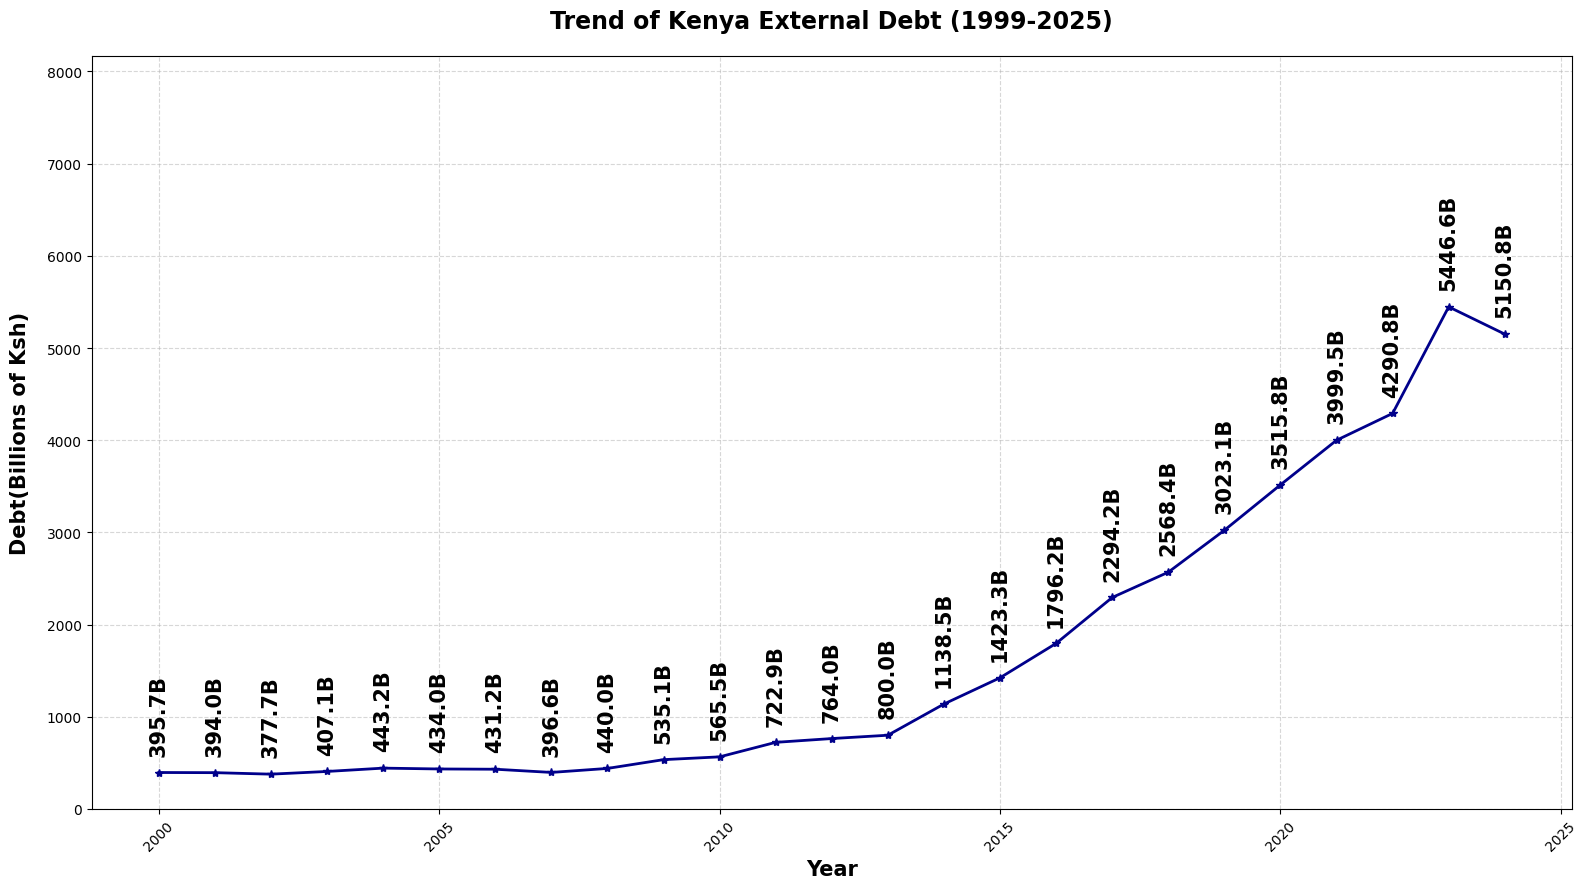

In [22]:
plt.figure(figsize=(16,9))
data_grouped1=data[data['Year']<2025].groupby('Year')['External Debt'].sum()/1000
plt.plot( data_grouped1.index, data_grouped1.values, marker='*', color='darkblue', linewidth=2, label='External Debt')

for year, value in data_grouped1.items():
    plt.annotate(
        f'{value:.1f}B',
        xy=(year, value),
        textcoords='offset points',
        xytext=(0, 15),
        ha='center',
        fontsize=15,
        fontweight='bold',
        rotation=90
    )

plt.title('Trend of Kenya External Debt (1999-2025)', fontsize=17, pad=20, fontweight='bold')
plt.xlabel('Year', fontsize=15, fontweight='bold')
plt.ylabel('Debt(Billions of Ksh)', fontsize=15, labelpad=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.ylim(0, data_grouped1.max() * 1.5) 
plt.tight_layout()
plt.show()

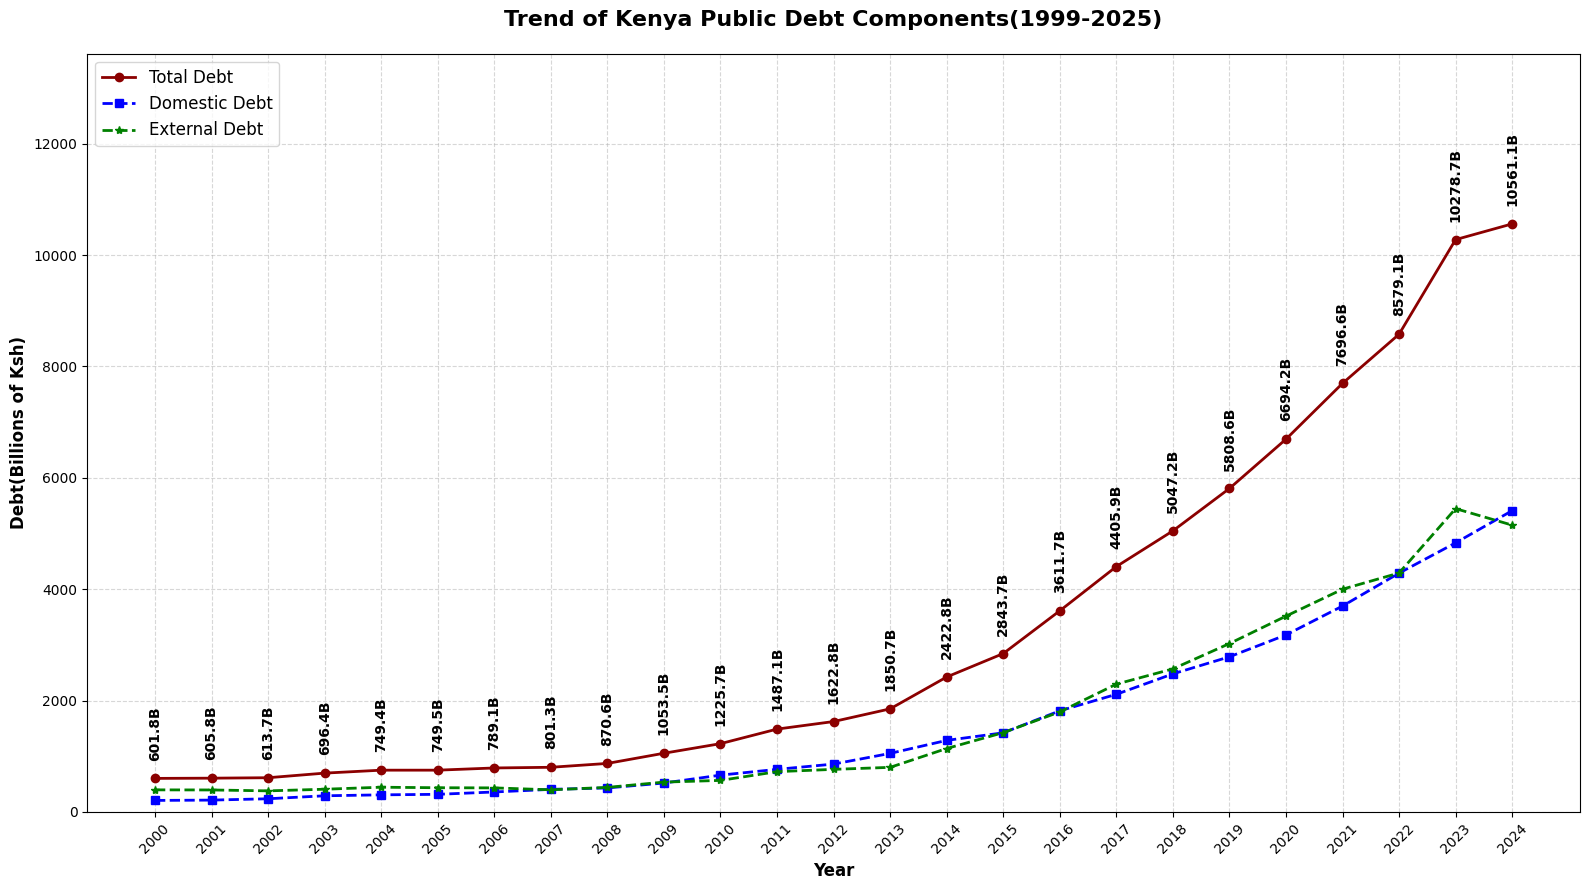

In [23]:
plt.figure(figsize=(16,9))
domestic_grouped=data[data['Year']<2025].groupby('Year')['Domestic Debt'].sum()/1000
external_grouped=data[data['Year']<2025].groupby('Year')['External Debt'].sum()/1000
total_grouped=data[data['Year']<2025].groupby('Year')['Total'].sum()/1000

plt.plot(total_grouped.index, total_grouped.values, marker='o', color='darkred',linewidth=2,label='Total Debt')
plt.plot(domestic_grouped.index, domestic_grouped.values, marker='s', color='blue',linewidth=2,label='Domestic Debt', linestyle='--')
plt.plot(external_grouped.index, external_grouped.values, marker='*', color='green',linewidth=2,label='External Debt', linestyle='--')

for year, value in total_grouped.items():
    plt.annotate(
        f'{value:.1f}B',
        xy=(year, value),
        xytext=(0,15),
        textcoords='offset points',
        ha='center',
        fontsize=10,
        fontweight='bold',
        rotation=90
    )

plt.title('Trend of Kenya Public Debt Components(1999-2025)', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Debt(Billions of Ksh)', fontsize=12, fontweight='bold')
plt.xticks(total_grouped.index, rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.ylim(0, data_grouped1.max() * 2.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
Kenya’s Public Debt Trajectory (1999–2025): A Visual and
Analytical Review
Introduction
Public debt remains a central pillar of fiscal policy, especially for developing economies pursuing growth
through infrastructure investment and social spending. Kenya’s debt profile over the last two and a half
decades reflects shifting economic priorities, financing strategies, and external shocks. This report
analyzes the evolution of domestic debt, external debt, and total public debt between 1999 and 2025
using visual trend analysis.
1. Trend of Kenya’s Domestic Debt
Kenya’s domestic debt increased gradually in the early 2000s, remaining below KSh 500 billion until
2007. From 2010 onward, domestic borrowing accelerated significantly, driven by increased reliance on
Treasury bills and bonds to finance budget deficits. By 2025, domestic debt exceeded KSh 5.4 trillion.
This shift reflects a preference for local financing to reduce foreign exchange risk, though it raises
concerns about rising interest costs and crowding out private sector credit.
2. Trend of Kenya’s External Debt
External debt remained relatively stable between 1999 and 2005, largely supported by concessional
financing from multilateral lenders. A sharp increase emerged after 2013, driven by Eurobond
issuances and large-scale infrastructure loans. External debt peaked above KSh 5.4 trillion before
showing a slight decline in 2025, suggesting repayments or restructuring. While external borrowing
enabled major development projects, it also increased exposure to currency and global interest rate
risks.
3. Trend of Kenya’s Total Public Debt
Total public debt combines domestic and external borrowing, providing a comprehensive view of
Kenya’s fiscal position. Debt levels remained below KSh 1 trillion until 2008, then accelerated sharply
after 2015. By 2025, total public debt exceeded KSh 10.5 trillion, reflecting persistent fiscal deficits,
infrastructure financing needs, and rising debt servicing obligations.
Policy Implications
The rapid growth in public debt underscores the need for enhanced debt sustainability measures,
improved revenue mobilization, and efficient public spending. Policymakers must carefully balance
domestic and external borrowing to manage interest and currency risks while ensuring that borrowed
funds generate long-term economic returns.
Conclusion
Kenya’s public debt trajectory from 1999 to 2025 illustrates a transition from moderate borrowing to
rapid debt accumulation. While debt has supported development and infrastructure expansion, its
continued growth presents significant fiscal challenges. Strengthened debt management frameworks
and productivity-driven investments will be critical to maintaining long-term macroeconomic stability.
